# Step (a) - Generate the data
The line assigning y corresponds to creating a linear model in which y is
a function of x1 and x2. Write out the form of the linear model.
What are the regression coefcients?


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)


print("True coefficients:")
print("β0 = 2, β1 = 2, β2 = 0.3")


True coefficients:
β0 = 2, β1 = 2, β2 = 0.3


# Step (b) - Correlation between x1 and x2
What is the correlation between x1 and x2? Create a scatterplot
displaying the relationship between the variables.

Correlation between x1 and x2: 0.772


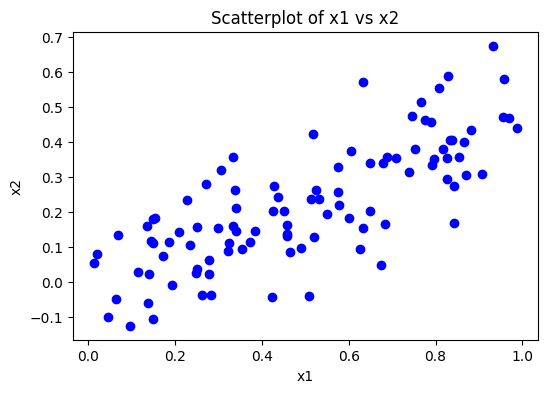

In [11]:
correlation = np.corrcoef(x1, x2)[0, 1]
print(f"Correlation between x1 and x2: {correlation:.3f}")

# Scatterplot to show relationship between x1 and x2
plt.figure(figsize=(6, 4))
plt.scatter(x1, x2, color='blue')
plt.title("Scatterplot of x1 vs x2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


# Step (c) - Fit least squares regression
Using this data, ft a least squares regression to predict y using
x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and
βˆ2? How do these relate to the true β0, β1, and β2? Can you
reject the null hypothesis H0 : β1 = 0? How about the null
hypothesis H0 : β2 = 0?

In [12]:
# Step (c) - Fit least squares regression
X = sm.add_constant(np.column_stack((x1, x2)))
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# Extract estimated coefficients
beta_hat_0 = results.params[0]
beta_hat_1 = results.params[1]
beta_hat_2 = results.params[2]

print("\nEstimated coefficients:")
print(f"β̂0 = {beta_hat_0:.3f}")
print(f"β̂1 = {beta_hat_1:.3f}")
print(f"β̂2 = {beta_hat_2:.3f}")

# Hypothesis testing
p_value_beta1 = results.pvalues[1]
p_value_beta2 = results.pvalues[2]
print("\nHypothesis testing:")
print(f"p-value for β1 = 0: {p_value_beta1}")
print(f"p-value for β2 = 0: {p_value_beta2}")




alpha = 0.05  # Significance level

# Conclusion based on p-values
print("\nConclusions:")
if p_value_beta1 < alpha:
    print("Reject the null hypothesis for β1.")
    print("There is evidence that β1 is not equal to 0.")
else:
    print("Fail to reject the null hypothesis for β1.")
    print("There is not enough evidence to conclude that β1 is different from 0.")
print()
if p_value_beta2 < alpha:
    print("Reject the null hypothesis for β2.")
    print("There is evidence that β2 is not equal to 0.")
else:
    print("Fail to reject the null hypothesis for β2.")
    print("There is not enough evidence to conclude that β2 is different from 0.")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           5.76e-08
Time:                        02:06:17   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

# Step (d)
Now fit a least squares regression to predict y using only x1.
Comment on your results. Can you reject the null hypothesis
H0 : β1 = 0?

In [13]:
# Fit least squares regression using only x1
X_x1 = sm.add_constant(x1)
model_x1 = sm.OLS(y, X_x1)
results_x1 = model_x1.fit()

print(results_x1.summary())

# Extract estimated coefficients
beta_hat_0_x1 = results_x1.params[0]
beta_hat_1_x1 = results_x1.params[1]

print("\nEstimated coefficients (using only x1):")
print(f"β̂0 = {beta_hat_0_x1:.3f}")
print(f"β̂1 = {beta_hat_1_x1:.3f}")

# Hypothesis testing for β1
p_value_beta1_x1 = results_x1.pvalues[1]
print("\nHypothesis testing (using only x1):")
print(f"p-value for β1 = 0: {p_value_beta1_x1}")


alpha = 0.05  # Significance level

# Conclusion based on p-value
print("\nConclusions (using only x1):")
if p_value_beta1_x1 < alpha:
    print("Reject the null hypothesis for β1.")
    print("There is evidence that β1 is not equal to 0.")
else:
    print("Fail to reject the null hypothesis for β1.")
    print("There is not enough evidence to conclude that β1 is different from 0.")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           1.37e-08
Time:                        02:06:17   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.0

# Step (e)
Now fit a least squares regression to predict y using only x2.
Comment on your results. Can you reject the null hypothesis
H0 : β1 = 0?

In [14]:
# Fit least squares regression using only x2
X_x2 = sm.add_constant(x2)
model_x2 = sm.OLS(y, X_x2)
results_x2 = model_x2.fit()

print(results_x2.summary())

# Extract estimated coefficients
beta_hat_0_x2 = results_x2.params[0]
beta_hat_2_x2 = results_x2.params[1]

print("\nEstimated coefficients (using only x2):")
print(f"β̂0 = {beta_hat_0_x2:.3f}")
print(f"β̂2 = {beta_hat_2_x2:.3f}")

# Hypothesis testing for β2
p_value_beta2_x2 = results_x2.pvalues[1]
print("\nHypothesis testing (using only x2):")
print(f"p-value for β2 = 0: {p_value_beta2_x2}")

alpha = 0.05  # Significance level

# Conclusion based on p-value
print("\nConclusions (using only x2):")
if p_value_beta2_x2 < alpha:
    print("Reject the null hypothesis for β2.")
    print("There is evidence that β2 is not equal to 0.")
else:
    print("Fail to reject the null hypothesis for β2.")
    print("There is not enough evidence to conclude that β2 is different from 0.")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           7.43e-07
Time:                        02:06:17   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.0

# Step (f)
 Do the results obtained in (c)–(e) contradict each other? Explain
your answer.

## Answer
The results from the models contradict each other:

- Model (c): When both x1 and x2 are included, β1 has a p-value of 0.0028 (significant), but β2's p-value is 0.2594 (not significant).
- Model (d): For x1 alone, the p-value is 0.0000 (significant).
- Model (e): For x2 alone, the p-value is also 0.0000 (significant).

This shows that x2 is significant on its own but loses significance when x1 is included, and vice versa. This indicates multicollinearity between x1 and x2, where their combined inclusion inflates standard errors and reduces the significance of one another’s coefficients.

 # Step (g) - Re-fit the models with the new observation


In [15]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])


In [16]:
# Re-fit model (c)
X = sm.add_constant(np.column_stack((x1, x2)))
model_g = sm.OLS(y, X)
results_g = model_g.fit()
print(results_g.summary())

# Re-fit model (d)
X_x1 = sm.add_constant(x1)
model_g_x1 = sm.OLS(y, X_x1)
results_g_x1 = model_g_x1.fit()
print(results_g_x1.summary())

# Re-fit model (e)
X_x2 = sm.add_constant(x2)
model_g_x2 = sm.OLS(y, X_x2)
results_g_x2 = model_g_x2.fit()
print(results_g_x2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           4.60e-08
Time:                        02:06:18   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0618      0.192     10.720      0.0

In [17]:
def perform_hypothesis_test(results, variable_index, alpha=0.05):
    p_value = results.pvalues[variable_index]
    if p_value < alpha:
        return f"Reject the null hypothesis. p-value = {p_value}"
    else:
        return f"Fail to reject the null hypothesis. p-value = {p_value}"

print("Model with both x1 and x2:")
print(f"Hypothesis test for β1: {perform_hypothesis_test(results_g, 1)}")
print(f"Hypothesis test for β2: {perform_hypothesis_test(results_g, 2)}")

print("\nModel with only x1:")
print(f"Hypothesis test for β1: {perform_hypothesis_test(results_g_x1, 1)}")

print("\nModel with only x2:")
print(f"Hypothesis test for β2: {perform_hypothesis_test(results_g_x2, 1)}")


Model with both x1 and x2:
Hypothesis test for β1: Fail to reject the null hypothesis. p-value = 0.06904442110548373
Hypothesis test for β2: Reject the null hypothesis. p-value = 0.0017617099217751874

Model with only x1:
Hypothesis test for β1: Reject the null hypothesis. p-value = 9.232532667271596e-07

Model with only x2:
Hypothesis test for β2: Reject the null hypothesis. p-value = 3.127972604875945e-08



New models

Model with both x1 and x2:


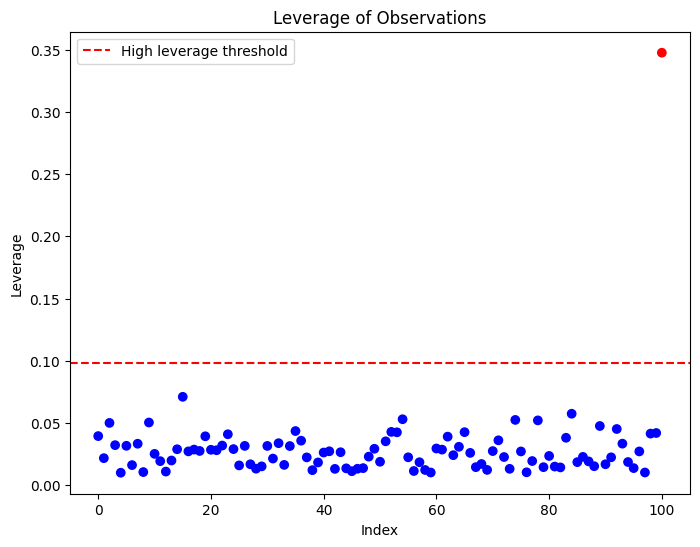


Model with only x1:


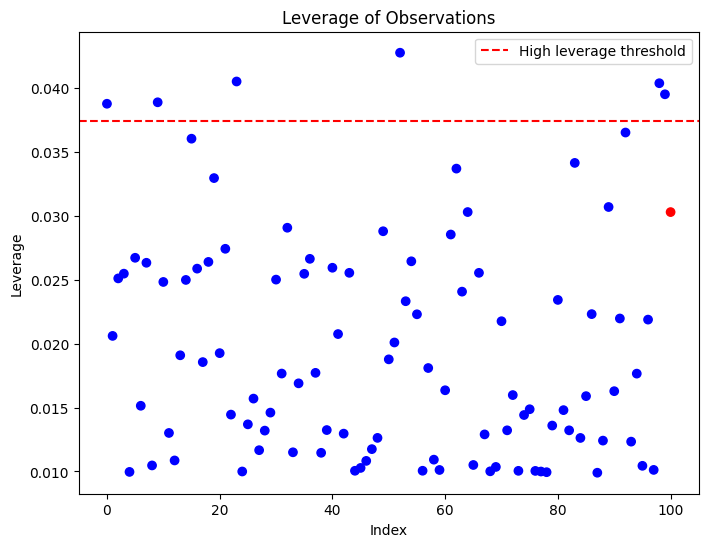


Model with only x2:


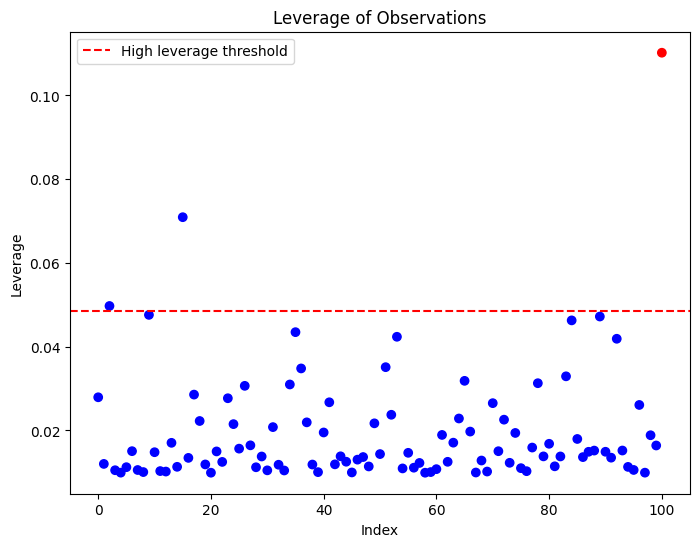

In [31]:
from statsmodels.stats.outliers_influence import OLSInfluence

def analyze_new_observation_effect(results):
  influence = OLSInfluence(results)
  dfbetas = influence.dfbetas
  dffits = influence.dffits
  cook_distance = influence.cooks_distance[0]
  leverage = influence.hat_matrix_diag


  fig, ax = plt.subplots(figsize=(8, 6))
  colors = ['blue'] * len(leverage)
  colors[-1] = 'red'  # Color the last point red

  ax.scatter(np.arange(len(leverage)), leverage, color=colors)
  ax.set_xlabel('Index')
  ax.set_ylabel('Leverage')
  ax.set_title('Leverage of Observations')
  ax.axhline(y=np.mean(leverage) + 2 * np.std(leverage), color='r', linestyle='--', label='High leverage threshold')
  ax.legend()
  plt.show()

  return
  print("DFBETAS:", dfbetas[-1])
  print("DFFITS:", dffits[-1])
  print("Cook's Distance:", cook_distance)


  if np.abs(dffits[-1]) > 2 * np.sqrt(results.df_model / len(y)):
    print("New observation is likely an outlier and has high leverage.")
  elif np.max(np.abs(dfbetas[-1])) > 1:
    print("New observation has high leverage and can influence the model.")
  elif cook_distance > 1:
    print("New observation has high influence on the model.")

  else:
    print("New observation doesn't seem to be an outlier or have high leverage.")




print("\nNew models")
print("\nModel with both x1 and x2:")
analyze_new_observation_effect(results_g)
print("\nModel with only x1:")
analyze_new_observation_effect(results_g_x1)
print("\nModel with only x2:")
analyze_new_observation_effect(results_g_x2)